# Product Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('sales.xlsx - Orders.csv')
returns = pd.read_csv('sales.xlsx - Returns.csv')
people = pd.read_csv('sales.xlsx - People.csv')

In [3]:
orders

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [4]:
returns

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU
...,...,...,...
1168,Yes,ES-2013-2639112,EU
1169,Yes,CA-2014-134194,United States
1170,Yes,ES-2012-3246286,EU
1171,Yes,ES-2012-4379168,EU


In [5]:
people

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa
5,Larry Hughes,AMEA
6,Nicole Hansen,Canada
7,Giulietta Dortch,Caribbean
8,Nora Preis,Central Asia
9,Jack Lebron,North


- order_id: Identifier for each order.
- order_date and ship_date: Dates of order placement and shipping.
- ship_mode: Shipping method chosen.
- customer_name: Name of the customer.
- segment: Market segment (e.g., consumer, corporate).
- state, country, market, region: Geographic information.
- product_id, category, sub_category, product_name: Product details.
- sales, quantity, discount, profit, shipping_cost: Sales and financial metrics.
- order_priority: Priority of the order.
- year: Year of the order.
- Returned: Indicator for returned items.

In [6]:
returns['order_id'] = returns['Order ID']
returns = returns.drop('Order ID', axis = 1)

In [7]:
people['customer_name'] = people['Person']
people = people.drop('Person', axis = 1)

In [8]:
df1 = pd.merge(orders, returns, on='order_id', how='left')

In [9]:
df1['Returned'] = df1['Returned'].fillna(0)
df1['Returned'] = df1['Returned'].replace('Yes',1)

In [10]:
df2 = pd.merge(df1, people, on='customer_name', how='left')

In [11]:
df2 = df2.drop(['Market','Region'],axis = 1)

In [19]:
df2['sales'] = df2['sales'].str.replace(',', '')
df2['sales'] = df2['sales'].astype('int64')
df2['profit_margin'] = df2.apply(lambda row: row['profit'] / row['sales'] if row['sales'] != 0 else 0, axis=1)
df2['profit_per_quantity'] = df2['profit'] / df2['quantity']


In [20]:
df2.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,Returned,profit_margin,profit_per_quantity
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408,2,0.0,106.140,35.46,Medium,2011,0,0.260147,53.070
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120,3,0.1,36.036,9.72,Medium,2011,0,0.300300,12.012
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66,4,0.0,29.640,8.17,High,2011,0,0.449091,7.410
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,45,3,0.5,-26.055,4.82,High,2011,0,-0.579000,-8.685
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,114,5,0.1,37.770,4.70,Medium,2011,0,0.331316,7.554


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51295 entries, 0 to 51294
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             51295 non-null  object 
 1   order_date           51295 non-null  object 
 2   ship_date            51295 non-null  object 
 3   ship_mode            51295 non-null  object 
 4   customer_name        51295 non-null  object 
 5   segment              51295 non-null  object 
 6   state                51295 non-null  object 
 7   country              51295 non-null  object 
 8   market               51295 non-null  object 
 9   region               51295 non-null  object 
 10  product_id           51295 non-null  object 
 11  category             51295 non-null  object 
 12  sub_category         51295 non-null  object 
 13  product_name         51295 non-null  object 
 14  sales                51295 non-null  int64  
 15  quantity             51295 non-null 

In [22]:
#Convert data

df2['sales'] = pd.to_numeric(df2['sales'], errors='coerce')


In [23]:
product_performance = df2.groupby('product_name').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()
top_performing_products = product_performance.nlargest(10, 'sales')
print("Top 10 performing products by sales:")
print(top_performing_products)

Top 10 performing products by sales:
                                           product_name  sales      profit
310                        Apple Smart Phone, Full Size  86936   5921.5786
970                        Cisco Smart Phone, Full Size  76441  17238.5206
2415                    Motorola Smart Phone, Full Size  73159  17027.1130
2501                       Nokia Smart Phone, Full Size  71904   9938.1955
866               Canon imageCLASS 2200 Advanced Copier  61600  25199.9280
1837         Hon Executive Leather Armchair, Adjustable  58200   5997.2541
2631  Office Star Executive Leather Armchair, Adjust...  50667   4710.9840
1714  Harbour Creations Executive Leather Armchair, ...  50120  10427.3260
2988                      Samsung Smart Phone, Cordless  48654   -198.0900
2502                  Nokia Smart Phone, with Caller ID  47880   9465.3257


In [72]:
region_sales = df2.groupby('region')['sales'].sum().reset_index()
highest_sales_region = region_sales.nlargest(10, 'sales') 
print("Region with the highest sales:")
print(highest_sales_region)

Region with the highest sales:
            region    sales
3          Central  2822612
10           South  1600960
7            North  1248727
9          Oceania  1100207
11  Southeast Asia   884438
8       North Asia   848349
5             EMEA   806184
0           Africa   783776
4     Central Asia   752839
12            West   725514


In [73]:
country_sales = df2.groupby('country')['sales'].sum().reset_index()
highest_sales_region = country_sales.nlargest(10, 'sales') 
print("country with the highest sales:")
print(highest_sales_region)

country with the highest sales:
            country    sales
139   United States  2297567
6         Australia   925257
44           France   858930
26            China   700591
47          Germany   628857
81           Mexico   623155
57            India   589664
138  United Kingdom   528570
58        Indonesia   404887
17           Brazil   361098


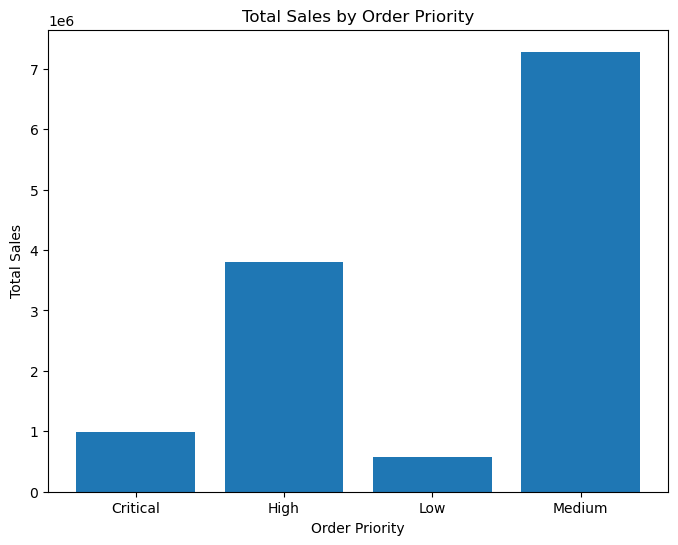

In [76]:
priority_sales = df2.groupby('order_priority')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(priority_sales['order_priority'], priority_sales['sales'])
plt.title('Total Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.show()

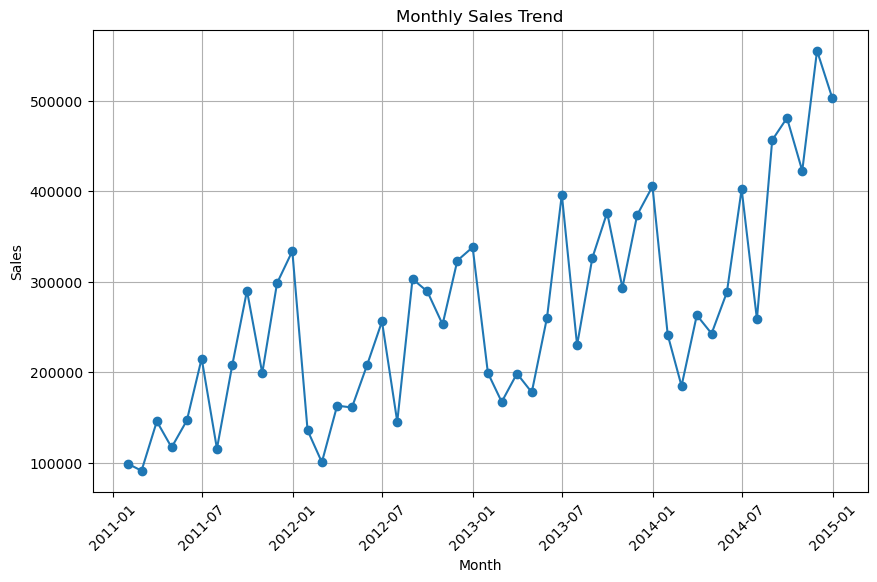

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

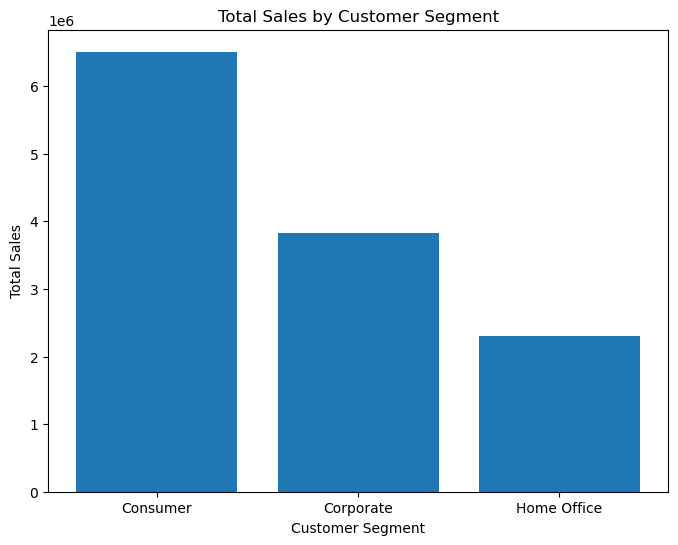

In [27]:
segment_sales = df2.groupby('segment')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(segment_sales['segment'], segment_sales['sales'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

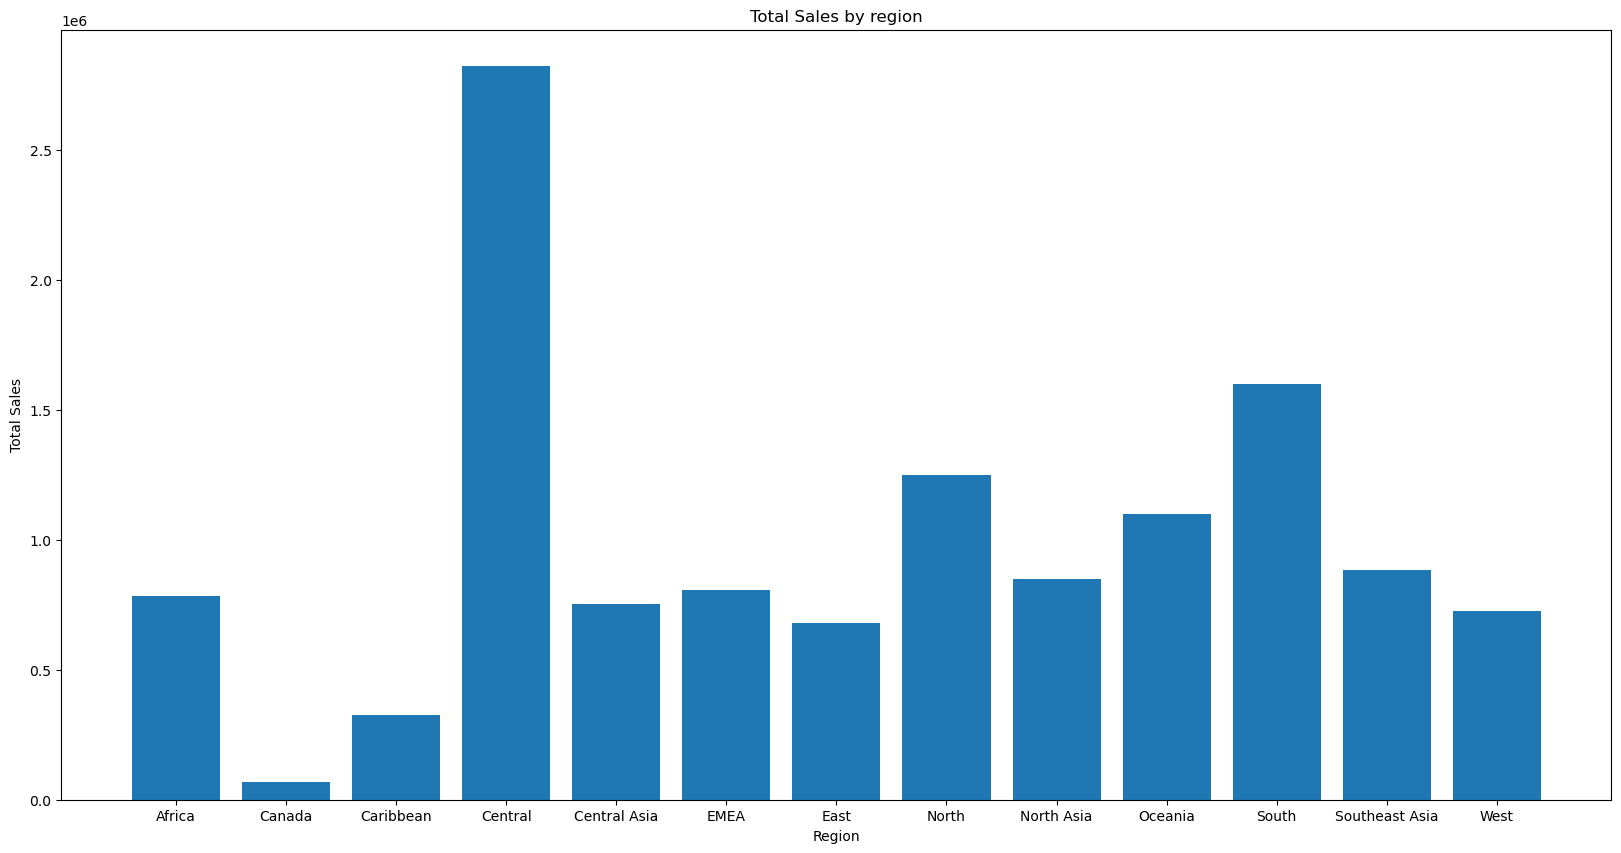

In [28]:
region_sales = df2.groupby('region')['sales'].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.bar(region_sales['region'], region_sales['sales'])
plt.title('Total Sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

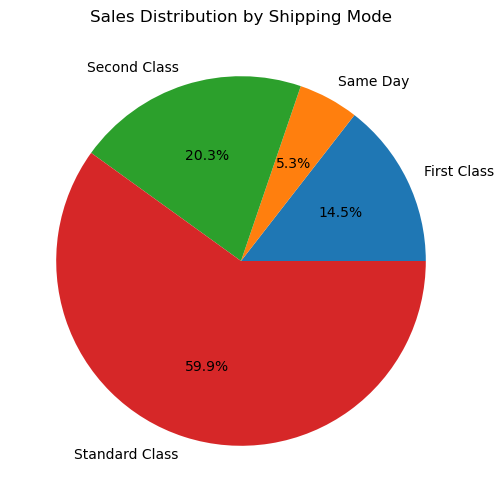

In [29]:
shipping_mode_sales = df2.groupby('ship_mode')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(shipping_mode_sales['sales'], labels=shipping_mode_sales['ship_mode'], autopct='%1.1f%%')
plt.title('Sales Distribution by Shipping Mode')
plt.show()

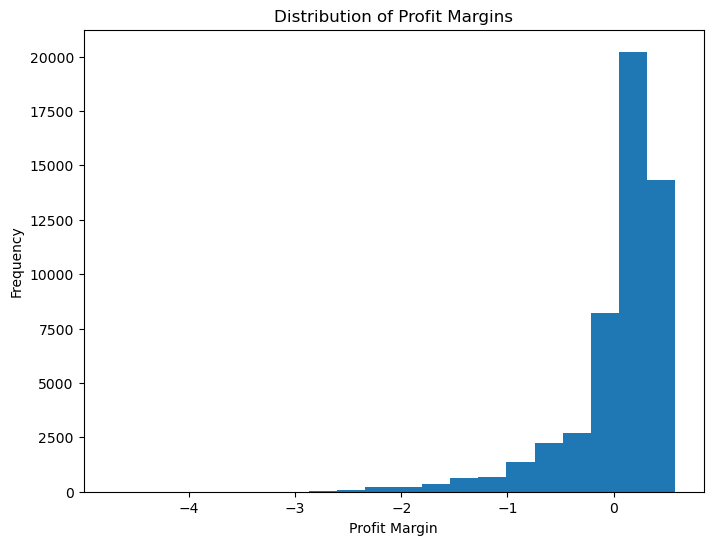

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df2['profit_margin'], bins=20)
plt.title('Distribution of Profit Margins')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

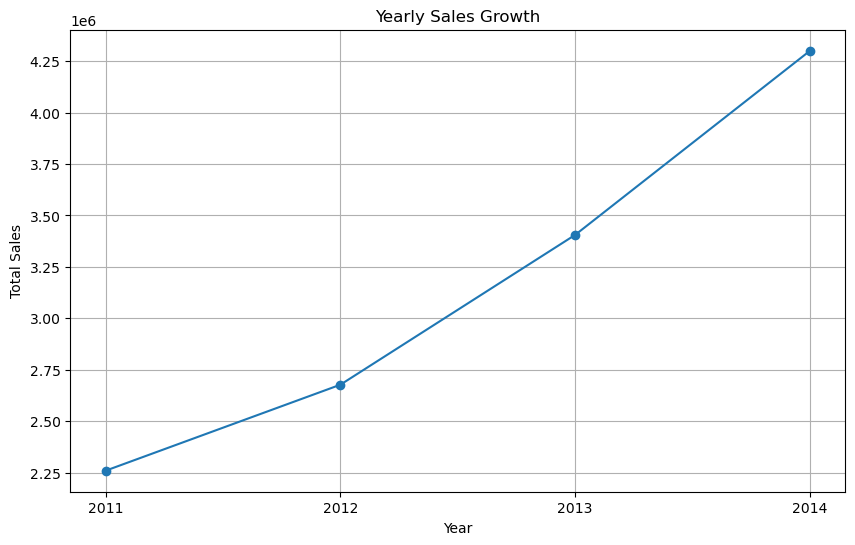

In [31]:
yearly_sales = df2.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['year'], yearly_sales['sales'], marker='o')
plt.title('Yearly Sales Growth')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales['year'])
plt.grid(True)
plt.show()

In [ ]:
yearly_sales = df2.groupby('year')['profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['year'], yearly_sales['sales'], marker='o')
plt.title('Yearly Sales Growth')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales['year'])
plt.grid(True)
plt.show()

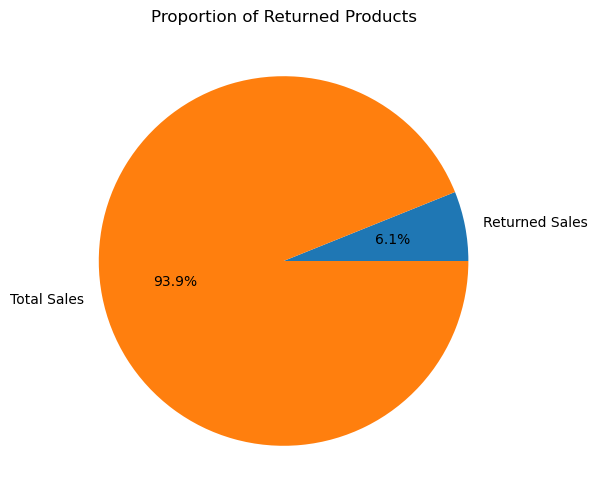

In [32]:
returned_products = df2[df2['Returned'] == 1]
returned_sales = returned_products['sales'].sum()
total_sales = df2['sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie([returned_sales, total_sales], labels=['Returned Sales', 'Total Sales'], autopct='%1.1f%%')
plt.title('Proportion of Returned Products')
plt.show()

Correlation Matrix:
                        sales  quantity  discount    profit  shipping_cost  \
sales                1.000000  0.313582 -0.086728  0.485947       0.768077   
quantity             0.313582  1.000000 -0.019869  0.104743       0.272650   
discount            -0.086728 -0.019869  1.000000 -0.316380      -0.079056   
profit               0.485947  0.104743 -0.316380  1.000000       0.357037   
shipping_cost        0.768077  0.272650 -0.079056  0.357037       1.000000   
year                -0.002923 -0.005062 -0.005905  0.002655      -0.003167   
Returned             0.011281  0.042051 -0.035798  0.015150       0.012254   
profit_margin        0.074713  0.050480 -0.846372  0.357207       0.067948   
profit_per_quantity  0.395132  0.003964 -0.398154  0.838761       0.296346   

                         year  Returned  profit_margin  profit_per_quantity  
sales               -0.002923  0.011281       0.074713             0.395132  
quantity            -0.005062  0.042051    

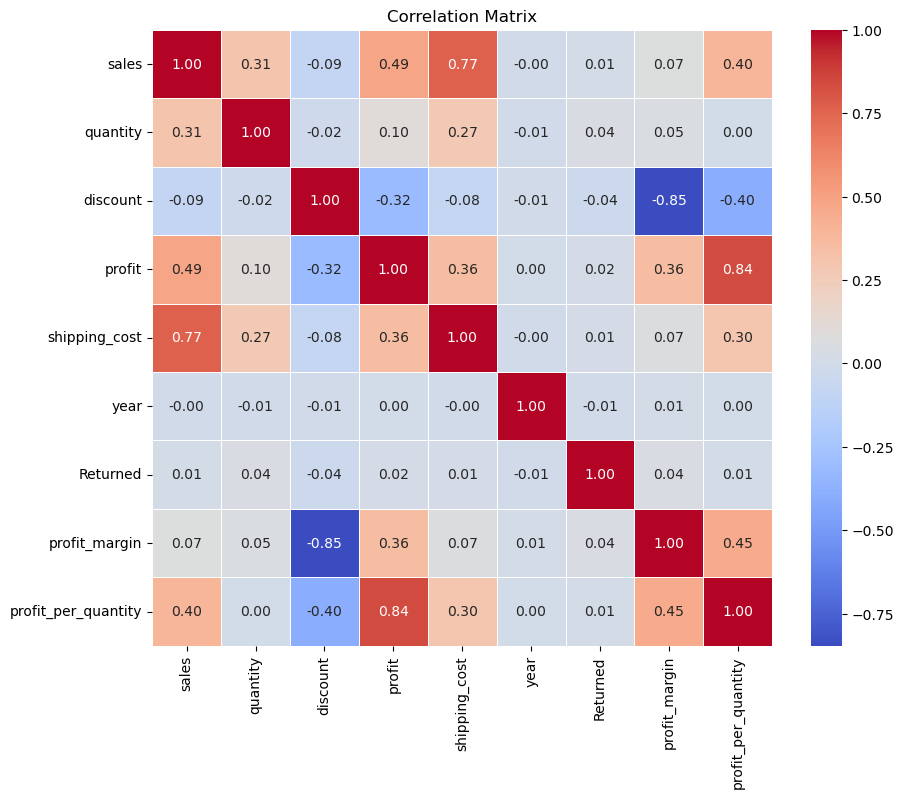

In [33]:
correlation_matrix = df2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

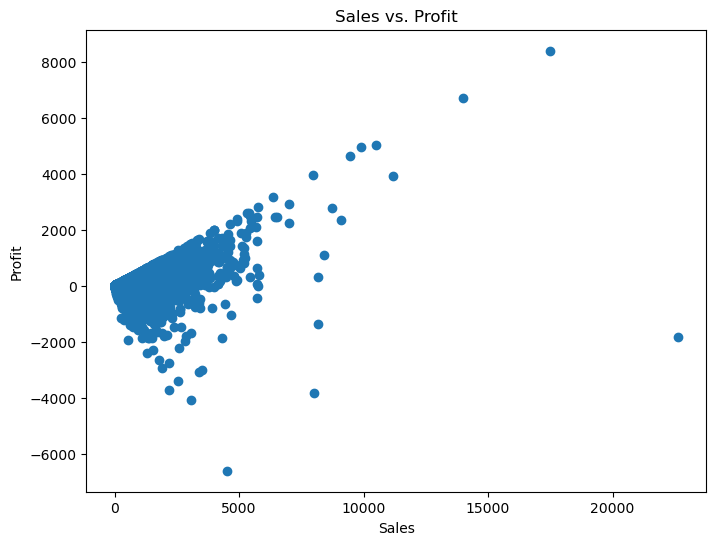

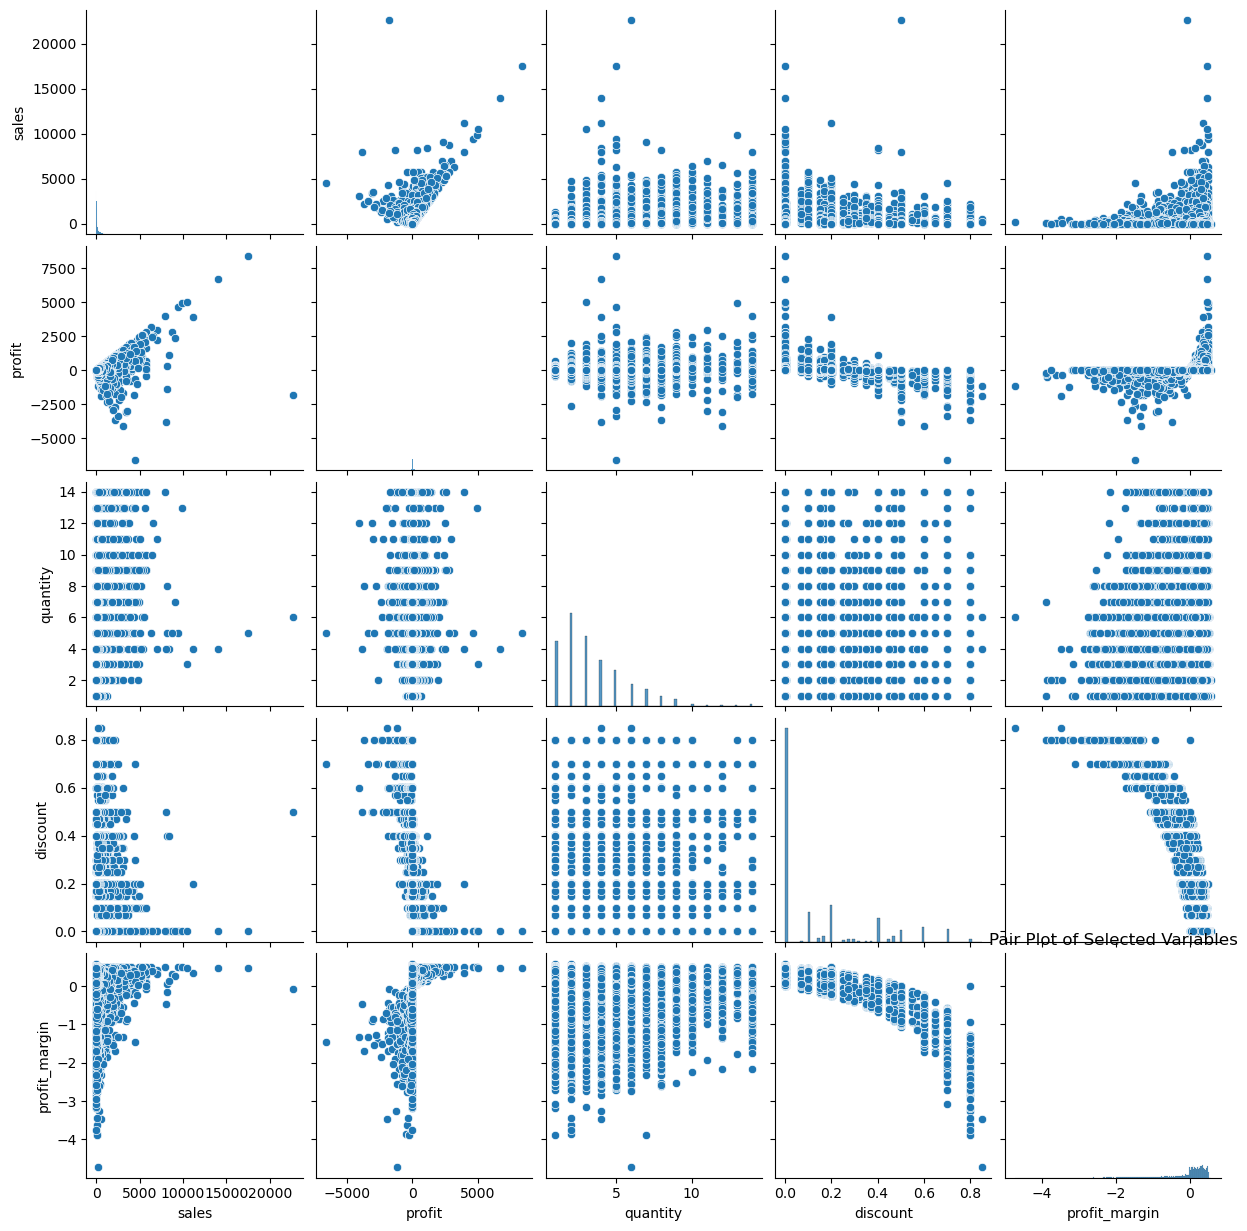

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['sales'], df2['profit'])
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

selected_cols = ['sales', 'profit', 'quantity', 'discount', 'profit_margin']
sns.pairplot(df2[selected_cols])
plt.title('Pair Plot of Selected Variables')
plt.show()

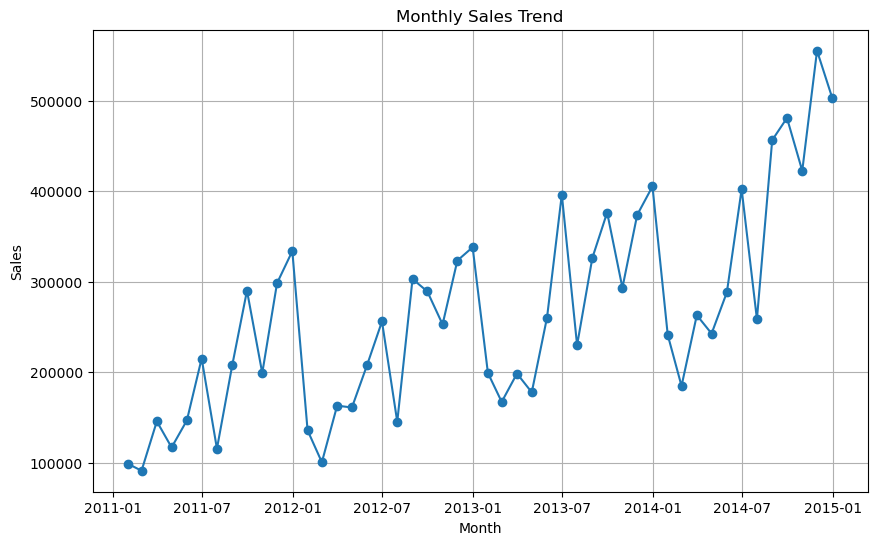

In [35]:
plt.figure(figsize=(10, 6))
df2['order_date'] = pd.to_datetime(df2['order_date'])
monthly_sales = df2.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [36]:
df2['ship_date'] = pd.to_datetime(df2['ship_date'])

In [39]:
df2['days_to_shipped'] = (df2['ship_date'] - df2['order_date']).dt.days
df2['days_to_shipped'] = df2['days_to_shipped'].astype('float64')

In [40]:
df2.describe()

,sales,quantity,discount,profit,shipping_cost,year,Returned,profit_margin,profit_per_quantity,days_to_shipped
count,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000
mean,246.488995,3.476518,0.142905,28.640874,26.374345,2012.777327,0.059557,0.047210,8.125766,3.969373
std,487.546024,2.278712,0.212272,174.416711,57.294351,1.098944,0.236667,0.466828,43.340597,1.729352
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,0.000000,-4.727752,-1319.995600,0.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,0.000000,0.000000,0.000000,3.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,0.000000,0.169254,3.390000,4.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,0.000000,0.333124,12.240000,5.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,1.000000,0.582800,1679.995200,7.000000


In [41]:
def remove_outliers_iqr(df, columns):

    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    return cleaned_df

numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

df2_cleaned = remove_outliers_iqr(df2, numerical_columns)

df2_cleaned = df2_cleaned.dropna()

In [42]:
model_df = df2_cleaned.drop(['order_id', 'order_date','ship_date', 'customer_name', 'country', 
                     'market', 'state', 'region','product_id', 
                     'product_name', 'sub_category'], axis = 1)

Correlation Matrix:
                        sales  quantity  discount    profit  shipping_cost  \
sales                1.000000  0.287172 -0.016256  0.412829       0.769732   
quantity             0.287172  1.000000  0.070648  0.227463       0.241306   
discount            -0.016256  0.070648  1.000000 -0.390274      -0.020630   
profit               0.412829  0.227463 -0.390274  1.000000       0.354960   
shipping_cost        0.769732  0.241306 -0.020630  0.354960       1.000000   
year                 0.006445 -0.003637  0.005544 -0.004897       0.006297   
Returned                  NaN       NaN       NaN       NaN            NaN   
profit_margin       -0.167447 -0.012218 -0.607546  0.554120      -0.129444   
profit_per_quantity  0.285064 -0.146998 -0.415752  0.807383       0.252890   
days_to_shipped      0.059515  0.018330  0.000746  0.020576      -0.165535   

                         year  Returned  profit_margin  profit_per_quantity  \
sales                0.006445       NaN   

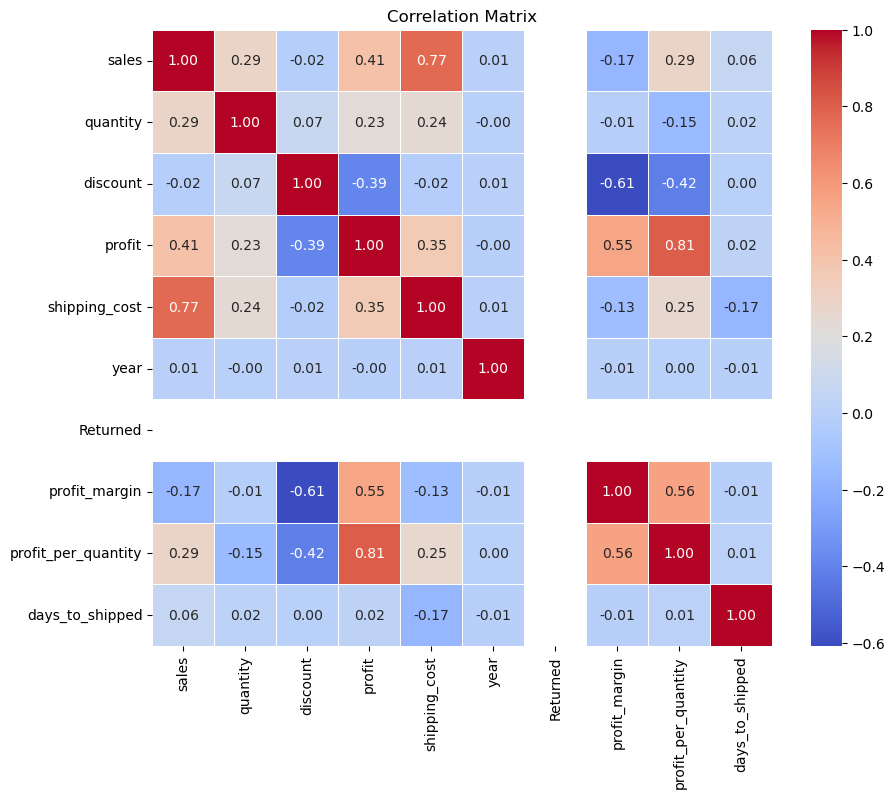

In [43]:
correlation_matrix = df2_cleaned.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#there are 2 colinearilty, sales to shipping cost, which makes sense 
# because more sales = more shipping
# Second is profit per quantity to profit and profit margin, this we only keep profit 
# for overall insights

In [44]:
model_df2 = model_df.drop(['shipping_cost','profit_per_quantity', 'profit_margin'], axis =1)

In [45]:
model_df2.columns

Index(['ship_mode', 'segment', 'category', 'sales', 'quantity', 'discount',
       'profit', 'order_priority', 'year', 'Returned', 'days_to_shipped'],
      dtype='object')

/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_27219/4256225972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_df2['sales'],  kde = True)


<Figure size 1000x600 with 0 Axes>

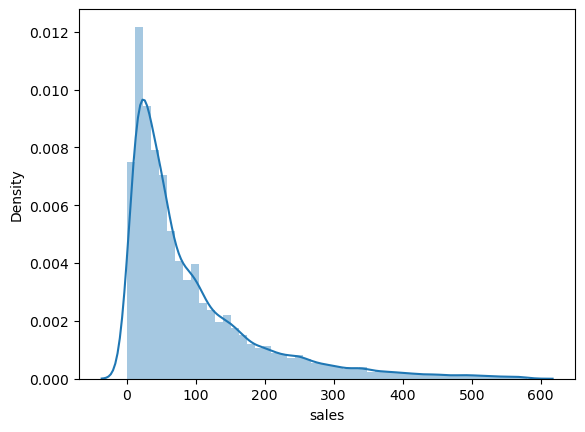

<Figure size 1000x600 with 0 Axes>

In [46]:
sns.distplot(model_df2['sales'],  kde = True)
plt.figure(figsize=(10,6))

In [47]:
one_hot = pd.get_dummies(model_df2[['ship_mode', 'segment', 'category','order_priority']])

one_hot = one_hot.astype(int)

model_df2 = pd.concat([model_df2, one_hot],axis =1)

model_df2 = model_df2.drop(['ship_mode', 'segment', 'category','order_priority'], axis = 1)

In [48]:
model_df2

,sales,quantity,discount,profit,year,Returned,days_to_shipped,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,...,segment_Consumer,segment_Corporate,segment_Home Office,category_Furniture,category_Office Supplies,category_Technology,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium
1,120.0,3.0,0.1,36.0360,2011.0,0.0,7.0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,66.0,4.0,0.0,29.6400,2011.0,0.0,4.0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,114.0,5.0,0.1,37.7700,2011.0,0.0,7.0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5,55.0,2.0,0.1,15.3420,2011.0,0.0,7.0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6,314.0,1.0,0.0,3.1200,2011.0,0.0,4.0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51288,79.0,3.0,0.0,25.3800,2014.0,0.0,7.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
51289,17.0,3.0,0.0,0.6600,2014.0,0.0,4.0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
51291,4.0,1.0,0.0,0.4200,2014.0,0.0,5.0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
51292,26.0,3.0,0.0,12.3600,2014.0,0.0,2.0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [56]:
x = model_df2.drop(['sales'],axis =1)
y = model_df2['sales']

In [60]:
def regression_unscaled(x,y): 
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)

    
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'XGBosst': XGBRegressor()
        }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_squared_error(y_test, y_pred)
        results[model_name] = {'R2 Score': r2, 'Mean Squared Error': mae}
    return results

In [61]:
result1 = regression_unscaled(x,y)
result1

{'Linear Regression': {'R2 Score': 0.3871069150353458,
  'Mean Squared Error': 5732.120611624121},
 'Ridge': {'R2 Score': 0.3871120489054951,
  'Mean Squared Error': 5732.072596784956},
 'Lasso': {'R2 Score': 0.3857024857354028,
  'Mean Squared Error': 5745.255623806934},
 'DecisionTreeRegressor': {'R2 Score': 0.07286041677318289,
  'Mean Squared Error': 8671.13048791132},
 'RandomForestRegressor': {'R2 Score': 0.5186225248614824,
  'Mean Squared Error': 4502.112709221064},
 'XGBosst': {'R2 Score': 0.5338477148043013,
  'Mean Squared Error': 4359.718175446616}}

In [64]:
from sklearn.preprocessing import StandardScaler

In [70]:
def regression_scaled(x,y): 
    x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state = 30)
    x_train = StandardScaler().fit_transform(x_train)
    x_val = StandardScaler().fit_transform(x_val)
    
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        r2 = r2_score(y_val, y_pred)
        mae = mean_squared_error(y_val, y_pred)
        results[model_name] = {'R2 Score': r2, 'Mean Squared Error': mae}
    return results

In [71]:
result2 = regression_scaled(x,y)
result2

{'Linear Regression': {'R2 Score': 0.38636886749448696,
  'Mean Squared Error': 5739.023247051244},
 'Ridge': {'R2 Score': 0.3863695681276035,
  'Mean Squared Error': 5739.016694336542},
 'Lasso': {'R2 Score': 0.38700704056531277,
  'Mean Squared Error': 5733.054693803046}}